# Linear Regression in Trading

Let us now see how linear regression works on trading data. You will build a linear regression model using Bank of America and J.P. Morgan's stock prices. Since you are using Bank of America's stock price to predict J.P. Morgan's price, Bank of America's price will be your independent variable and x coordinate. 
J.P. Morgan will be your dependent variable and y coordinate. To read a CSV file, you can use the `read_csv` method of `pandas`. 

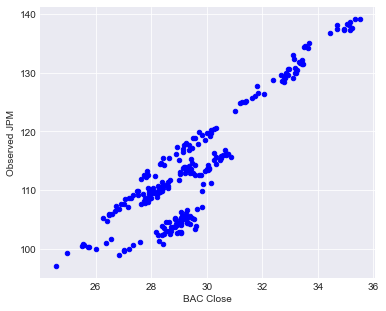

In [1]:
# Import the libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')


# The data is stored in the directory 'data_modules'
path = '../data_modules/'
# Read the csv file using the read_csv method of pandas
data = pd.read_csv(path + 'jpm_and_bac_price_2019.csv', 
                   index_col=0)
data.plot.scatter('BAC Close','Observed JPM', color='blue',
                  figsize=(6,5));

You can use the `fit()` method of `statsmodels.api.OLS` to compute the variables needed to develop a linear regression model. The syntax is shown below:

Syntax: 
``` python
import statsmodels.api as sm
model = sm.OLS(y, X).fit()
```

1. **y**: y coordinate
2. **X**: x coordinate

The following methods/properties are used.

1. add_constant(): Compute the coefficient, as default is considered 0.
2. summary(): View the details of the regression model.

In [2]:
import warnings
warnings.simplefilter('ignore')
import statsmodels.api as sm
Y = data['Observed JPM']
X = sm.add_constant(data['BAC Close'])
model = sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Observed JPM   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     1101.
Date:                Tue, 05 Oct 2021   Prob (F-statistic):           2.17e-93
Time:                        08:53:41   Log-Likelihood:                -728.85
No. Observations:                 251   AIC:                             1462.
Df Residuals:                     249   BIC:                             1469.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.8576      3.764     -2.885      0.004     -18.270      -3.445
BAC Close      4.2167      0.127     33.185      0.000       3.966       4.467
==============================================================================
Omnibus:                       37.420   Durbin-Watson:                   0.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.956
Skew:                          -0.626   Prob(JB):                     6.28e-06
Kurtosis:                       2.150   Cond. No.                         399.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3]:
model.params

const       -10.857609
BAC Close     4.216694
dtype: float64

The linear regression equation can be computed as follows:

In [4]:
print(f"y = {round(model.params[0],2)} + \
            {round(model.params[1],2)} * x")
print(f"JPM = {round(model.params[0],2)} + \
              {round(model.params[1],2)} * BAC")

y = -10.86 +             4.22 * x
JPM = -10.86 +               4.22 * BAC


But how well is Bank of America's price data able to predict the price of J. P. Morgan. For this, we will use the goodness of fit metric or R<sup>2</sup>, as it is commonly known.

Let us also understand the math behind the metric and learn how to calculate it using the `sklearn` library in Python. 

# R-squared

**R-squared** is also known as the **Coefficient of Determination** and is denoted by $R^2$.

You have already seen that the R-squared explains the percentage of variation in the dependent variable, y, that is described by the independent variable, X. It is equal to the square of correlation. Mathematically,<br>

$$
R^2 = \frac{Variance\,Explained\,by\,the\,Model}{Total\,Variance}\\[1cm]$$
$$ =1 - \frac{Unexplained\,Variance}{Total\,Variance}\\[1cm]$$
$$ =1 - \frac{Sum\,Squared\,Regression\,Error}{Sum\,Squared\,Total\,Error}\\[1cm]$$
$$ =1 - \frac{\sum_{i=1}^n(y_i-\hat y_i)^2}{\sum_{i=1}^n(y_i-\bar y)^2}
$$

Where, 
- $y_i$ is the observed value for the $i^{th}$ row. 
- $\hat y_i$ is the predicted value for the $i^{th}$ row.
- $\bar y$ is the average of observed $y$'s.

Now, since you understand the math behind $R^2$, what is the range of $R^2$? The value of $R^2$ always lies between 0 and 1. 

Refer back to the formula above, and you will be able to see that $R^2$ will be 1 if and only if all the $y_i$'s would be exactly equal to the respective $\hat y_i$'s. That means $R^2$ will be 1 when the model will be able to predict all the values precisely. And $R^2$ will be 0 when the model will not be able to capture any relationship between the $X$'s and the $y$'s.

#### Calculate R-squared

Let us calculate the R-squared for the above data using the formula.

In [5]:
r_sq = 1 - ((data['Observed JPM']-data['Predicted JPM_BAC']) \
            ** 2).sum()/((data['Observed JPM'] \
                          - data['Observed JPM'].mean()) \
                         ** 2).sum()
print('The R-squared is %.2f' % r_sq)

The R-squared is 0.82


The above value of R-squared means that 82% of the variance in the stock price of J.P. Morgan is explained by the variance in the stock price of Bank of America.

You can also calculate the same using the `sklearn` library. The `sklearn` library has a `r2_score` function which can be imported as below:
```python
from sklearn.metrics import r2_score
```

Using the `r2_score` function, the R-squared can be calculated as shown below:
```python
r2_score(y_true,y_predicted)
```

In [6]:
from sklearn.metrics import r2_score
r_sq = r2_score(data['Observed JPM'], data['Predicted JPM_BAC'])
print('The R-squared is %.2f' % r_sq)

The R-squared is 0.82


Let us read another CSV file stored in the same directory and check the value of $R^2$. This file has observed and predicted stock price of J.P. Morgan. This time, the stock price of J.P. Morgan has been predicted using the stock price of Nestle.

In [7]:
data_nestle = pd.read_csv(path \
                          + 'predicted_jpm_and_nestle_price_2019.csv',
                          index_col=0)
data_nestle.tail()

,Observed JPM,Nestle Close,Predicted JPM_Nestle
Date,,,
23-12-2019,137.199997,108.800003,120.207267
24-12-2019,137.580002,108.589996,120.048491
26-12-2019,139.039993,108.709999,120.139220
27-12-2019,139.139999,108.980003,120.343358
30-12-2019,138.630005,107.849998,119.489012


In [8]:
r_sq = r2_score(data_nestle['Observed JPM'], 
                data_nestle['Predicted JPM_Nestle'])
print('The R-squared is %.2f' % r_sq)

The R-squared is 0.35


Can you interpret the value of $R^2$ above? The above value of R-squared, 0.35, means that only 35% of the variance in the stock price of J.P. Morgan is explained by the variance in the stock price of Nestle. 

Let us have a look at the plot of the JPM Price vs BAC Price and JPM Price vs Nestle Price.

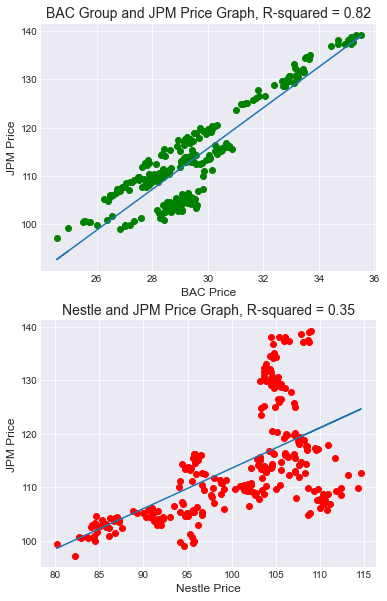

In [9]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 5*2))

# Plot of JPM Price vs BAC Price
ax1.scatter(data['BAC Close'], data['Observed JPM'], 
            color="green")
ax1.plot(data['BAC Close'], data['Predicted JPM_BAC'])
# Set the title and labels for the plot
ax1.set_title('BAC Group and JPM Price Graph, R-squared = %.2f' \
              %r2_score(data['Observed JPM'],
                        data['Predicted JPM_BAC']), fontsize=14)
ax1.set_xlabel('BAC Price', fontsize=12)
ax1.set_ylabel('JPM Price', fontsize=12)


# Plot of JPM Price vs Nestle Price
ax2.scatter(data_nestle['Nestle Close'], 
            data_nestle['Observed JPM'], color="red")
ax2.plot(data_nestle['Nestle Close'], 
         data_nestle['Predicted JPM_Nestle'])
# Set the title and labels for the plot
ax2.set_title('Nestle and JPM Price Graph, R-squared = %.2f' \
              %r2_score(data_nestle['Observed JPM'],
                        data_nestle['Predicted JPM_Nestle']), 
              fontsize=14)
ax2.set_xlabel('Nestle Price', fontsize=12)
ax2.set_ylabel('JPM Price', fontsize=12)

plt.show()

Of the two values of the $R^2$ that we have seen, which one do you think is better?

Yes, the first value (82%) is better as it explains more variance. In the first graph, you can see that the points are closer to the line of best fit and scattered in the second graph. This explains the difference between the two values of the $R^2$.

Intuitively, the change in the stock price of J.P. Morgan would be highly correlated to the change in the stock price of Bank of America, and it would not be correlated to the change in the stock price of Nestle. This is because both J.P. Morgan and Bank of America belong to the same sector of Banking, and are very sensitive to factors like interest rates. Nestle belongs to a different sector, Fast Moving Consumer Goods. The dynamics of this sector are different and are affected by different factors.

## Limitations of R-squared

R-squared does not allow us to see if the predictions are biased. This can be done by the analysis of the residuals. Any pattern in the residual plot will help us identify the bias in our model if any. Hence, a high $R^2$ alone will always not be a good statistic.

#### Conclusion

R-squared is one of the most popular metrics to measure the goodness of fit of a linear regression model. 

Using R-squared, you concluded how the stock price of Bank of America was able to explain better the variance in the stock price of J.P. Morgan. Can you think of any other stock price that can also help you explain this variance? The stock price of any other bank or investment institute might do the job for you. 

Now it's your turn. You can download any such data from finance.yahoo.com and apply what you learned.

The linear regression is a simple way to model relationship between the independent and dependent variables.